Importing Dependencies

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [46]:
#Loading the csv data to a pandas daataframe
url=r"C:\Users\princ\OneDrive\Documents\Chapter 1\Python\Machine Learning\ML Data\gld_price_data.csv"
data = pd.read_csv(url)

In [47]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [48]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [49]:
#Checking for missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [50]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [51]:
#Checking te correlation between the data
data = data.drop(['Date'],axis=1)
Correlation = data.corr()

<Axes: >

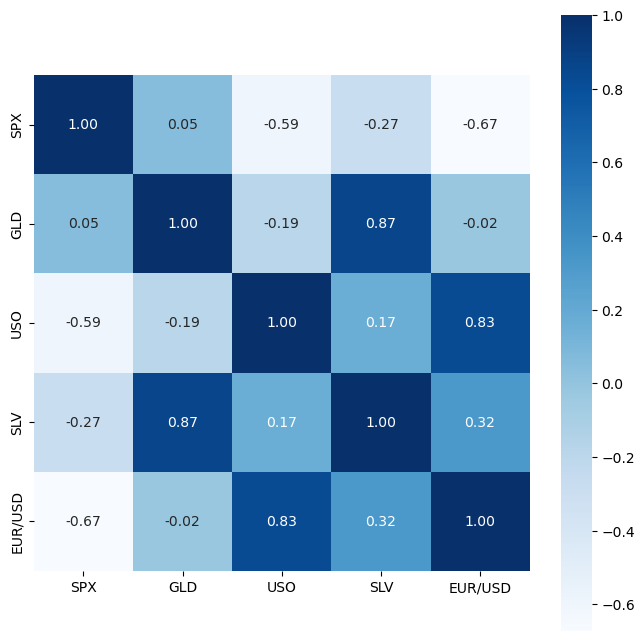

In [52]:
#Construtiing the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(Correlation,cbar=True,square=True,fmt = '.2f',annot=True,annot_kws={'size':10},cmap='Blues')


In [54]:
#Correlation values of GLD
correlation = data.corr()
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\princ\AppData\Local\Temp\ipykernel_17516\2945070218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

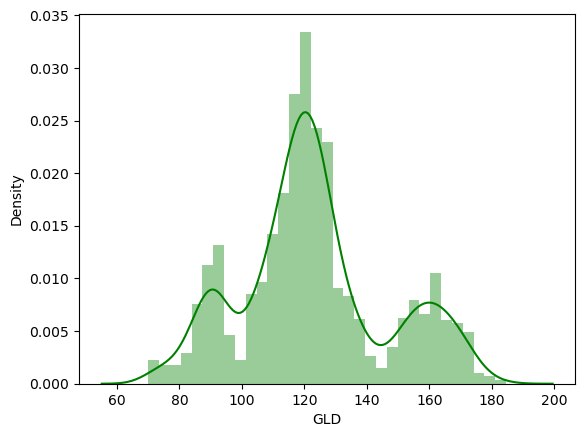

In [57]:
#checking for distribution of gold price
sns.distplot(data['GLD'],color='green')

Splitting the features and the Target

In [58]:
X = data.drop(['GLD'],axis = 1)
y = data['GLD']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

In [60]:
model = RandomForestRegressor()

In [61]:
model.fit(X_train,y_train)

RandomForestRegressor()

Model Evaluation

In [64]:
#Model Accuracy on the Testing Data
X_test_pred = model.predict(X_test)
print(X_test_pred)


[122.51919959 131.02580248 127.52629952  96.6465976  119.09480053
 114.27849912 124.88530127 117.67859949 108.06340068  98.24389986
  95.76469949 167.46679829 148.63970122 115.97730058 170.90550088
  85.14139957 123.06849887 109.51359706 113.30210057 131.47330267
 124.31089894 113.74200118 116.07950024 108.8762     108.49440142
 125.85539926 119.56369935 112.22149932 113.72210156 125.41319919
 145.43020125  89.48019972 167.87239951 114.03199933 108.51600081
 120.21680112 141.37479859 161.4908015  173.77359796 153.10990148
 119.47400127 113.57510061 121.3201997  113.54299898 122.08149995
 107.86340071  88.44909875 114.40419923 130.09530228 118.10100104
 103.82220018 130.05480238 107.23429856 160.59390359 131.79300037
 117.9988999  146.95290018 135.16360223  95.58020127 124.75790175
 115.15709865  86.1224008  104.29379914 113.84490077  84.14989906
 122.35480028 116.57239905 113.65950213 164.44560257  92.21980006
  80.4069008  161.05140052 158.24020226 106.67939999 148.33740128
 109.81339

In [66]:
#Rsquared error
error_score = metrics.r2_score(y_test,X_test_pred)
print("R Squared Error:", error_score)

R Squared Error: 0.9897835536618519


Comparing the Actual and Predicted  values

In [67]:
y_test = list(y_test)

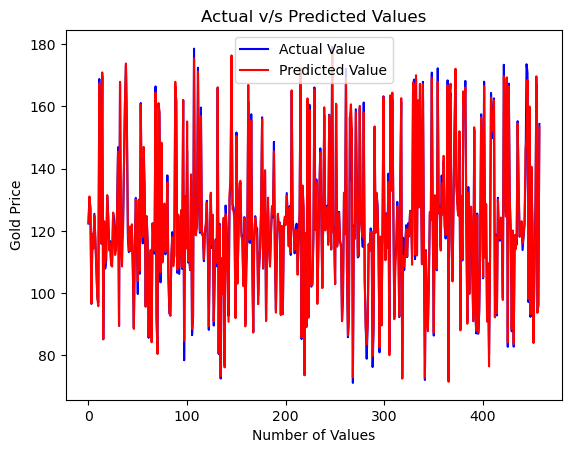

In [73]:
plt.plot(y_test,color='Blue',label = "Actual Value")
plt.plot(X_test_pred,color = 'Red',label = "Predicted Value")
plt.title("Actual v/s Predicted Values")
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()
          